#Using pandas

In this worksheet, we'll demonstrate the advantages of using the ***pandas*** library

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
bw_util = pd.DataFrame.from_csv("../../Data/bw_utilization.csv",)
print bw_util.columns

Index([u'L0', u'L1', u'L2', u'L3', u'L4'], dtype='object')


In [74]:
## First 6 rows:
print bw_util.head()

          L0        L1        L2        L3        L4
TS                                                  
1   0.592117  0.427099  0.272425  0.612865  0.343287
2   0.810115  0.409538  0.365069  0.642694  0.366607
3   0.527574  0.437505  0.389349  0.534613  0.317781
4   0.633060  0.519896  0.319068  0.578266  0.250029
5   0.733728  0.390816  0.295451  0.604470  0.332559


In [75]:
##  Last 8 rows:
print bw_util.tail(8)

           L0        L1        L2        L3        L4
TS                                                   
492  0.733857  0.541410  0.326319  0.570268  0.287145
493  0.784640  0.580308  0.469248  0.593130  0.282134
494  0.718334  0.625589  0.345414  0.567815  0.246983
495  0.666247  0.494801  0.445832  0.573137  0.357206
496  0.657845  0.544728  0.367659  0.593301  0.416179
497  0.740334  0.501102  0.382019  0.534598  0.423463
498  0.725509  0.519998  0.406033  0.556561  0.389955
499  0.719233  0.518768  0.420606  0.550234  0.402521


In [76]:
## Last 10 elements of column L0:
print bw_util.tail(10).L0

TS
490    0.666443
491    0.739953
492    0.733857
493    0.784640
494    0.718334
495    0.666247
496    0.657845
497    0.740334
498    0.725509
499    0.719233
Name: L0, dtype: float64


In [77]:
##  First 25 Rows of Columns TS, L0, L4:
print bw_util[['L0', 'L4']].head(25)

          L0        L4
TS                    
1   0.592117  0.343287
2   0.810115  0.366607
3   0.527574  0.317781
4   0.633060  0.250029
5   0.733728  0.332559
6   0.770988  0.421785
7   0.661005  0.232494
8   0.704694  0.356986
9   0.671194  0.372473
10  0.657490  0.332049
11  0.664960  0.270915
12  0.642531  0.276843
13  0.590015  0.266549
14  0.674762  0.359377
15  0.744773  0.307107
16  0.716031  0.397821
17  0.727079  0.352441
18  0.723488  0.297654
19  0.725333  0.408900
20  0.647840  0.314474
21  0.826166  0.352063
22  0.742476  0.354603
23  0.717750  0.314518
24  0.608406  0.388402
25  0.732556  0.403364


# Some Statistical Functionalities

In [78]:
##  Correlation Matrix:
print bw_util.corr()

          L0        L1        L2        L3        L4
L0  1.000000  0.699605  0.709484  0.608176  0.717431
L1  0.699605  1.000000  0.885219  0.771498  0.889954
L2  0.709484  0.885219  1.000000  0.654594  0.965138
L3  0.608176  0.771498  0.654594  1.000000  0.672890
L4  0.717431  0.889954  0.965138  0.672890  1.000000


In [79]:
##  Covariance Matrix:
print bw_util.cov()

          L0        L1        L2        L3        L4
L0  0.012814  0.011793  0.018693  0.008259  0.018696
L1  0.011793  0.022174  0.030681  0.013782  0.030509
L2  0.018693  0.030681  0.054174  0.018278  0.051715
L3  0.008259  0.013782  0.018278  0.014392  0.018584
L4  0.018696  0.030509  0.051715  0.018584  0.052999


#Graphics

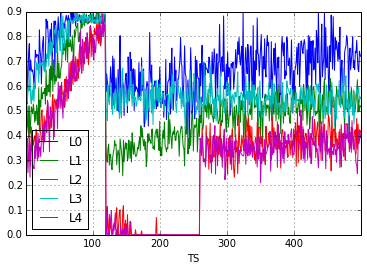

In [80]:
bw_util.plot()
plt.show()

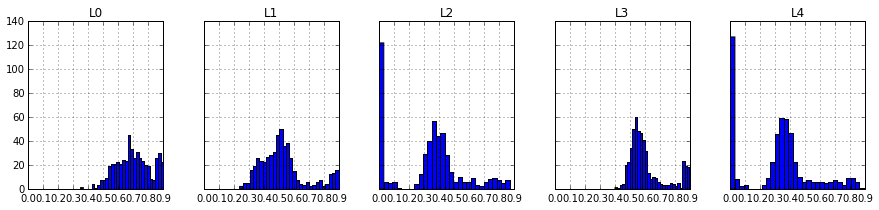

In [81]:
fig, myaxes = plt.subplots(nrows=1, ncols=len(bw_util.columns), sharex=True, sharey=True, figsize = (15, 3))
bw_util.hist(ax=myaxes, bins = 30)
plt.show()

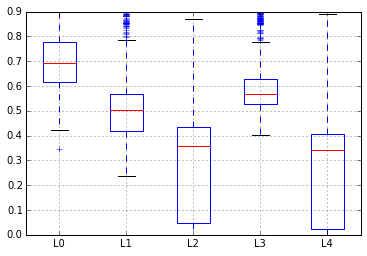

In [82]:
bw_util.boxplot(return_type='axes')
plt.show()

#Behold the Power of Pandasql

In terminal window, type:

**>pip install pandasql**

In [83]:
import pandasql as psql

In [84]:
top10L0 = psql.sqldf("SELECT TS, L0 FROM bw_util ORDER BY L0 DESC, TS LIMIT 10", locals())
print top10L0

    TS        L0
0  324  0.900000
1  436  0.900000
2  445  0.900000
3   68  0.899315
4   76  0.899289
5   53  0.897918
6   70  0.896869
7  108  0.895523
8   97  0.894279
9  100  0.893931


In [85]:
top10L1 = psql.sqldf("SELECT TS, L1 FROM bw_util ORDER BY L1 DESC, TS LIMIT 10", locals())
print top10L1

    TS        L1
0  114  0.897869
1  100  0.897133
2  106  0.894421
3  109  0.892048
4  118  0.890043
5   91  0.889991
6  116  0.889444
7   97  0.887841
8  107  0.885436
9   83  0.885247


Are there any $top10L0$ that are also in the $top10L1$?

In [86]:
intersect = psql.sqldf("SELECT * FROM top10L0 INNER JOIN top10L1 USING (TS)", locals())
print intersect

    TS        L0        L1
0   97  0.894279  0.887841
1  100  0.893931  0.897133


##Conclusion

This is a very superficial introduction to the **pandas** and **pandasql** libraries. The more you use them, the happier you will be that you are using them